<a href="https://colab.research.google.com/github/lunaB/AI-Study/blob/master/6_mnist_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
torch.manual_seed(1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.cuda.manual_seed_all(1)

In [2]:
mnist_train = datasets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = datasets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


In [3]:
print(mnist_train)
print(mnist_train.data.shape)
print(mnist_train.targets.shape)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])
torch.Size([60000])


In [0]:
dataloader = torch.utils.data.DataLoader(mnist_train, 100, shuffle=True, drop_last=True)

In [0]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10, bias=True).to(device)

    def forward(self, x):
        return self.linear(x)

In [44]:
model = MnistModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)

n_epoch = 15
for epoch in range(n_epoch+1):
    batch_loss = 0
    for idx, mini_batch in enumerate(dataloader):
        x_train, y_train = mini_batch
        x_train = x_train.view(-1,28*28).to(device)
        y_train = y_train.to(device)
        
        pred = model(x_train)

        loss = F.cross_entropy(pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss += loss.item()

    print(epoch, batch_loss/len(dataloader))
    batch_loss = 0


0 0.5344583390156428
1 0.3594207636266947
2 0.33141266539692876
3 0.31651836874584355
4 0.3069908840830127
5 0.30028648013869924
6 0.2948709929858645
7 0.29084551353007554
8 0.2874730032682419
9 0.28446922339499
10 0.2819732815648119
11 0.2796928762272
12 0.27760585681845745
13 0.27611449752002953
14 0.2746423282970985
15 0.27298702736695607


tensor(5)


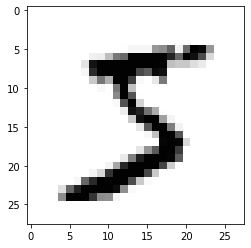

In [85]:
import matplotlib.pyplot as plt
x_train, y_train = dataloader.dataset[0]
data = model(x_train.view(-1, 28*28).to(device)).detach()[0]
print(torch.argmax(data))
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [82]:
# mnist_test.data[0].view(-1,28*28)
a = model(mnist_test.data.view(-1,28*28).float().to(device)).detach()

print('Accuracy : %.2f%%'%((mnist_test.targets == torch.argmax(a, 1)).float().mean().item()*100))

Accuracy : 88.29%
